## 导数和微积分
假设我们有一个函数: $f: \mathbb R^n \to \mathbb R$, 其输入和输出都是标量。如果$f$的导数存在，这个极限被定义为:
$$
f^{'}(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)} {h} \tag{2.4.1}
\label{11}
$$
如果$f^{'}$存在，则称$f$在$a$处是*可微（differentiable）*的。如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。我们可以将$2.4.1$中的导数$f^{'}$解释为$f(x)$相对于$x$的*瞬时（instantaneous）*变化率。所谓的瞬时变化率是基于$x$中的变化$h$, 且$h$接近$0$。

导数的几个等价符号。给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式是等价的:
$$
f^{'}(x) = y^{'}=\frac{dy}{dx}=\frac{df}{dx}=\frac{d}{dx}f(x)=Df(x)=D_xf(x) \tag{2.4.2}
$$

其中符号$\frac{d}{dx}$和$D$是*微分运算符*, 表示微分操作。我们可以使用以下规则来对常见函数求微分:
- $DC=0$（$C$是一个常数）
- $Dx^n = nx^{n-1}$ （*幂律（power rule）*，$n$是任意实数）
- $De^x = e^x$
- $Dln(x)=1/x$

为了微分一个一些由常见函数组成的函数，下面一些法则方便使用。假设函数$f$和$g$都是可微的，$C$是一个常数，则：

*常数相乘法则*
$$
\frac{d}{dx}[Cf(x)] = C\frac{d}{dx}f(x) \tag{2.4.3}
$$

*加法法则*
$$
\frac{d}{dx}[f(x) + g(x)] = \frac{d}{dx}f(x) + \frac{d}{dx}g(x) \tag{2.4.4}
$$

*乘法法则*
$$
\frac{d}{dx}[f(x)g(x)] = f(x)\frac{d}{dx}[g(x)] + g(x)\frac{d}{dx}[f(x)] \tag{2.4.5}
$$

*除法法则*
$$
\frac{d}{dx}\left[\frac{f(x)}{g(x)}\right] = \frac{g(x)\frac{d}{dx}[f(x)] - f(x)\frac{d}{dx}[g(x)]}{[g(x)]^2} \tag{2.4.6}
$$


## 后续对导数进行可视化

In [1]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

使用matplotlib进行可视化。注意，注释```#@save```是一个特殊标记，会将对应的函数、类或语句保存在```d2l```包中。因此，以后无需重新定义就可以直接调用它们（例如，```d2l.use_svg_display()```）

In [3]:
def use_svg_display(): #@save
    """使用svg格式在jupyter中显示绘图，可以获得更清晰的图像"""
    backend_inline.set_matplotlib_formats('svg')

我们定义```set_figsize```函数来设置图表大小。注意，这里我们直接使用```d2l.plt```，因为导入语句```from matplotlib import pyplot as plt```已标记为保存到```d2l```包中。

In [4]:
def set_figsize(figsize=(3.5,2.5)): #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的```set_axes```函数用于设置由```matplotlib```生成图表的轴的属性

In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个图形配置的函数，我们定义了plot函数来简洁地绘制多条曲线，因为我们需要在整个书中可视化许多曲线。

In [6]:
#@save
def plot(X, Y=None,xlabel=None, ylabel=None,legend=None,xlim=None,ylim=None,
         xscale='linear',yscale='linear', fmts=('-', 'm--', 'g-', 'r'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # 如果X有一个轴，则输出True
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    elif Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以绘制函数$u=f(x)=3x^2 - 4x$及其在$x = 1$处的切线$y=2x - 3$，其中系数$2$是切线的斜率。

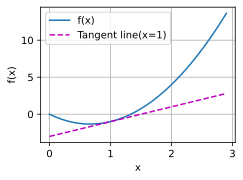

In [7]:
def f(x):
    return 3 * x**2 - 4 * x

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line(x=1)'])

### 如何求$f(x)=3x^2-4x$在某点$x_0$的切线方程
1. 先求导:
$f^{'}= 6x - 4$
2. $x_0$带入得:
$f^{'}(x_0) = 6x_0 - 4$
3. 根据点斜式:
$y - f(x_0) = f^{'}(x_0)(x - x_0)$

因为$f(1)=-1$, $f^{'}(-1)=2$, 得:
$$
y - (-1) = 2(x-1) 
$$
$$
y + 1 = 2x - 2
$$
$$
y = 2x - 3
$$


函数$y=f(x)$在点$x_0$的导数的几何意义，就是曲线$y=f(x)$在点$P(x_0, f(x_0))$处的切线的斜率，即$k = f^{'}(x_0)$

## 偏导数
到目前为止，我们只讨论了仅含一个变量的函数的微分。我们将微分的思想推广达到多元函数（multivariate function）上。
设$y = f(x_1, x_2, ...,x_n)$是一个具有$n$个变量的函数，$y$关于第$i$个参数$x_i$的偏导数（partial derivative）为:
$$
\frac{\partial y}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1,...,x_{i-1}, x_{i+h}, x_{i+1},...,x_n) - f(x_1,...x_i,...,x_n)}{h}
\tag {2.4.7}
$$


为了计算$\frac{\partial y}{\partial x_i}$，我们可以简单地将$x_1,...x_{i-1}, x_{i+1},...,x_n$看作常数，并计算$y$关于$x_i$的导数，对于偏导数的表示，以下是等价的:

$$
\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_if=D_{x_i}f \tag{2.4.8}
$$

## 梯度

我们可以连接一个多元函数对其所有变量的偏导数，以得到该函数的 *梯度(gradient)* 向量，具体而言，设函数$f: \mathbb R^n \to \mathbb R$的输入是一个$n$维向量 $X=[x_1, x_2,...,x_n]^\top$，并且输出是一个标量。函数$f(x)$相对于$X$的梯度是一个包含$n$哥偏导数的向量:
$$
\nabla_xf(x) = \left [ \frac{\partial f(x)}{\partial x_i}, \frac{\partial f(x)}{\partial x_2},..., \frac{\partial f(x)}{\partial x_n} \right]^\top \tag{2.4.9}
$$

其中$\nabla_xf(x)$通常在没有歧义时被$\nabla f(x)$取代。

假设$X$为$n$维向量，在微分多元函数时经常使用以下规则:
- 对于所有$A \in \mathbb R^{m \times n}$，都有$\nabla_xA_X = A^\top$
- 对于所有$A \in \mathbb R^{m \times n}$，都有$\nabla_xx^\top A = A$
- 对于所有$A \in \mathbb R^{m \times n}$，都有$\nabla_xx^\top A_X = (A + A^\top)_X$
- $\nabla_x\begin{Vmatrix}X\end{Vmatrix}^2 = \nabla_xX^\top X = 2X$

同样，对于任何矩阵$X$，都有$\nabla_x \begin{Vmatrix}X\end{Vmatrix}^2_F = 2X$，正如我们之后看到的，梯队对于设计深度学习中的优化算法有很大用处。

## 链式法则
然而，上面方法可能很难找到梯度。这是因为在深度学习中，多元函数通常是 *复合(composite)* 的，所以我们可能没法应用上述任何规则来微分这些函数。幸运的是，链式法则使我们能够微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则:
$$
\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx} \tag{2.4.10}
$$

现在我们将注意力转移到具有任意数量的变量的情况。假设可微分函数$y$有变量$u_1,u_2,...,u_m$，其中每个可微分函数$u_i$都有变量$x_i, x_2,...,x_n$，注意，$y$是$x_1,x_2,...,x_n$的函数。对于任意$i=1,2,...,n$，链式法则给出：
$$
\frac{dy}{dx+i} = \frac{dy}{du_1} \frac{du_1}{dx_1} + \frac{dy}{du_2} \frac{du_2}{dx_2} + ... + \frac{dy}{du_m} \frac{du_m}{dx_i}    \tag{2.4.11}
$$

## 练习题
1. 绘制函数$y=f(x)=x^3 - \frac{1}{x}$和在其$x=1$处切线的图像

解:
先求切线。
$$f^{'}(x) = 3x^2 -x^{-1} = 3x^2 +x^{-2}$$
$$f^{'}(1)= 3 + 1=4$$
$$f(1)=1-1=0$$

因为:$$y - f(1) = f^{'}(1)(x - 1)$$
故: $$y - 0 = 4(x-1)$$ 
得函数$y=f(x)=x^3 - \frac{1}{x}$在$x=1$切线方程$y = 4x-4$


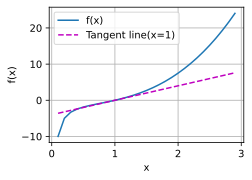

In [8]:
def f(x):
    return x**3 - x**-1
# 从0.1开始，到3，步长为0.1
x = np.arange(0.1, 3, 0.1)
plot(x, [f(x), 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line(x=1)'])